In [1]:
!pip install ultralytics -q

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 882.0/882.0 kB 19.1 MB/s eta 0:00:00


In [3]:
!mkdir semiconductor

In [4]:
from glob import glob

# 이미지들의 주소 리스트로 만들어줌

test_img_list = glob('/content/drive/MyDrive/kdt_240424/m8_vision응용/semiconductor/data-20241007T010441Z-001/data/test/images/*.jpg')
train_img_list = glob('/content/drive/MyDrive/kdt_240424/m8_vision응용/semiconductor/data-20241007T010441Z-001/data/train/images/*.jpg')
valid_img_list = glob('/content/drive/MyDrive/kdt_240424/m8_vision응용/semiconductor/data-20241007T010441Z-001/data/valid/images/*.jpg')

# 리스트를 txt파일로 생성
with open('/content/semiconductor/train.txt', 'w') as f:
   f.write('\n'.join(train_img_list) + '\n')

with open('/content/semiconductor/valid.txt', 'w') as f:
   f.write('\n'.join(valid_img_list) + '\n')

with open('/content/semiconductor/test.txt', 'w') as f:
   f.write('\n'.join(test_img_list) + '\n')

In [5]:
!cp /content/drive/MyDrive/kdt_240424/m8_vision응용/semiconductor/data-20241007T010441Z-001/data/data.yaml /content/semiconductor/

In [6]:
from IPython.core.magic import register_line_cell_magic

@register_line_cell_magic
def writetemplate(line,cell):
  with open(line,'w') as f:
    f.write(cell.format(**globals()))

In [7]:
%%writetemplate /content/semiconductor/data.yaml
train: /content/semiconductor/train.txt
val: /content/semiconductor/valid.txt
test: /content/semiconductor/test.txt

nc: 4
names: ['Bdot', 'curve', 'dot', 'straight']

In [8]:
from ultralytics import YOLO

# 미리 학습된 YOLOv8 모델 로드
model = YOLO('yolov8n.pt')

# 학습 수행
model.train(data='/content/semiconductor/data.yaml', epochs=50, imgsz=640)

Ultralytics 8.3.6 🚀 Python-3.10.12 torch-2.4.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/content/semiconductor/data.yaml, epochs=50, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train2, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show

100%|██████████| 755k/755k [00:00<00:00, 23.4MB/s]


Overriding model.yaml nc=80 with nc=4

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics

100%|██████████| 5.35M/5.35M [00:00<00:00, 110MB/s]


AMP: checks passed ✅


train: Scanning /content/drive/MyDrive/kdt_240424/m8_vision응용/semiconductor/data-20241007T010441Z-001/data/train/labels... 198 images, 9 backgrounds, 0 corrupt: 100%|██████████| 198/198 [01:39<00:00,  1.99it/s]

train: New cache created: /content/drive/MyDrive/kdt_240424/m8_vision응용/semiconductor/data-20241007T010441Z-001/data/train/labels.cache


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


/usr/local/lib/python3.10/dist-packages/albumentations/__init__.py:13: UserWarning: A new version of Albumentations is available: 1.4.17 (you have 1.4.15). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()
val: Scanning /content/drive/MyDrive/kdt_240424/m8_vision응용/semiconductor/data-20241007T010441Z-001/data/valid/labels... 41 images, 11 backgrounds, 0 corrupt: 100%|██████████| 41/41 [00:16<00:00,  2.42it/s]

val: New cache created: /content/drive/MyDrive/kdt_240424/m8_vision응용/semiconductor/data-20241007T010441Z-001/data/valid/labels.cache


Plotting labels to runs/detect/train2/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.00125, momentum=0.9) with parameter groups 63 weight(decay=0.0), 70 weight(decay=0.0005), 69 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train2
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50      2.34G      3.251      16.04      1.409         28        640: 100%|██████████| 13/13 [00:06<00:00,  2.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.01s/it]

                   all         41        113          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/50      2.39G       3.24      12.79      1.244         25        640: 100%|██████████| 13/13 [00:06<00:00,  2.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.19it/s]

                   all         41        113          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/50       2.3G      3.018       8.21      1.261         17        640: 100%|██████████| 13/13 [00:03<00:00,  3.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.09it/s]

                   all         41        113          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/50      2.31G      2.927      8.014      1.127         29        640: 100%|██████████| 13/13 [00:03<00:00,  4.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.51it/s]


                   all         41        113   3.75e-05     0.0147    2.2e-05   6.59e-06

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/50       2.3G      2.962      9.496       1.11         17        640: 100%|██████████| 13/13 [00:05<00:00,  2.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.87it/s]

                   all         41        113   3.75e-05     0.0147    2.2e-05   6.59e-06



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/50      2.29G      3.072      9.393      1.212         36        640: 100%|██████████| 13/13 [00:03<00:00,  4.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.93it/s]

                   all         41        113   3.75e-05     0.0147    2.2e-05   6.59e-06



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/50      2.31G      2.883      7.074      1.082         20        640: 100%|██████████| 13/13 [00:03<00:00,  4.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.35it/s]

                   all         41        113   3.75e-05     0.0147    2.2e-05   6.59e-06



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/50      2.31G      2.842      6.722      1.149         27        640: 100%|██████████| 13/13 [00:05<00:00,  2.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.86it/s]

                   all         41        113   0.000944      0.285      0.263      0.168



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/50      2.31G      2.689      8.985       1.05         40        640: 100%|██████████| 13/13 [00:03<00:00,  4.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.24it/s]

                   all         41        113    0.00123      0.369      0.285      0.123



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/50      2.33G      2.733      6.725      1.093         18        640: 100%|██████████| 13/13 [00:03<00:00,  4.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.24it/s]

                   all         41        113      0.768      0.279       0.35      0.151



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/50      2.31G      2.815      5.861      1.157         26        640: 100%|██████████| 13/13 [00:05<00:00,  2.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.63it/s]

                   all         41        113      0.983      0.254      0.355      0.167



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/50      2.32G      2.741      6.632      1.029         13        640: 100%|██████████| 13/13 [00:03<00:00,  4.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.07it/s]

                   all         41        113      0.764      0.325      0.403      0.164



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/50       2.3G      2.588       7.43      1.065         24        640: 100%|██████████| 13/13 [00:03<00:00,  4.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.54it/s]


                   all         41        113      0.529      0.465      0.451      0.217

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/50       2.3G      2.626      5.312      1.098         45        640: 100%|██████████| 13/13 [00:05<00:00,  2.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.67it/s]

                   all         41        113      0.467      0.433      0.488       0.21



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/50      2.32G      2.672       4.87      1.058         28        640: 100%|██████████| 13/13 [00:03<00:00,  4.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.43it/s]

                   all         41        113      0.459      0.424      0.431      0.148



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/50      2.29G      2.617      3.961      1.119         18        640: 100%|██████████| 13/13 [00:03<00:00,  3.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.39it/s]


                   all         41        113      0.557      0.371      0.405      0.166

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/50      2.33G       2.55      4.869      1.028         13        640: 100%|██████████| 13/13 [00:05<00:00,  2.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.79it/s]

                   all         41        113      0.365      0.455      0.333      0.189



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/50       2.3G      2.519      4.323      1.088         12        640: 100%|██████████| 13/13 [00:03<00:00,  4.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.04it/s]

                   all         41        113      0.539      0.288      0.324      0.159



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/50       2.3G       2.48      4.754      1.041         25        640: 100%|██████████| 13/13 [00:03<00:00,  4.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.17it/s]

                   all         41        113      0.983       0.25      0.367      0.158



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/50      2.32G      2.464      4.677      1.032         12        640: 100%|██████████| 13/13 [00:04<00:00,  2.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.77it/s]

                   all         41        113      0.286      0.462      0.367      0.176



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/50      2.28G      2.583      4.776     0.9625         29        640: 100%|██████████| 13/13 [00:03<00:00,  3.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.50it/s]

                   all         41        113      0.699      0.266      0.324       0.17



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/50       2.3G      2.616      4.108      1.064         21        640: 100%|██████████| 13/13 [00:03<00:00,  4.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.23it/s]

                   all         41        113      0.713      0.519      0.567       0.29



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/50       2.3G      2.621      4.001      1.024         39        640: 100%|██████████| 13/13 [00:03<00:00,  3.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.19it/s]

                   all         41        113      0.573       0.53      0.518      0.264



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/50       2.3G      2.346      3.545      1.037         34        640: 100%|██████████| 13/13 [00:04<00:00,  3.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.44it/s]

                   all         41        113      0.895      0.476      0.555      0.297



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/50      2.31G      2.387      3.075      1.057         34        640: 100%|██████████| 13/13 [00:03<00:00,  4.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.32it/s]

                   all         41        113      0.885        0.5      0.523       0.29



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/50      2.31G      2.319      3.122          1         44        640: 100%|██████████| 13/13 [00:03<00:00,  3.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.14it/s]

                   all         41        113      0.888      0.515       0.55      0.252



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/50      2.31G      2.325      4.182      0.957         17        640: 100%|██████████| 13/13 [00:04<00:00,  2.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.49it/s]

                   all         41        113      0.926      0.429      0.552      0.341



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/50      2.31G      2.288      3.273      1.011         11        640: 100%|██████████| 13/13 [00:03<00:00,  4.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.19it/s]

                   all         41        113      0.912      0.344      0.465      0.217



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/50      2.28G      2.408      2.857      1.038         32        640: 100%|██████████| 13/13 [00:03<00:00,  3.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.75it/s]


                   all         41        113      0.886      0.337      0.492       0.26

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/50       2.3G      2.387      3.671      0.946         18        640: 100%|██████████| 13/13 [00:05<00:00,  2.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.98it/s]


                   all         41        113        0.8      0.497      0.506      0.285

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/50      2.32G      2.318      3.095     0.9885         16        640: 100%|██████████| 13/13 [00:03<00:00,  4.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.14it/s]

                   all         41        113      0.823      0.535      0.552      0.235



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/50      2.31G      2.395      3.349     0.9811         36        640: 100%|██████████| 13/13 [00:03<00:00,  3.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.14it/s]

                   all         41        113      0.667      0.438      0.457      0.199



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/50      2.28G      2.371      3.012     0.9962         18        640: 100%|██████████| 13/13 [00:05<00:00,  2.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.46it/s]

                   all         41        113      0.549      0.452      0.443      0.188



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/50       2.3G      2.199      2.799      0.998         15        640: 100%|██████████| 13/13 [00:03<00:00,  4.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.13it/s]

                   all         41        113      0.742      0.303      0.428      0.228



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/50      2.29G      2.451      3.376     0.9712         15        640: 100%|██████████| 13/13 [00:02<00:00,  4.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.89it/s]

                   all         41        113        0.5      0.406      0.464       0.18



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/50      2.29G        2.3      3.127     0.9844         25        640: 100%|██████████| 13/13 [00:05<00:00,  2.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.86it/s]

                   all         41        113      0.799      0.343      0.473      0.212



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/50      2.31G      2.307      3.227     0.9878         22        640: 100%|██████████| 13/13 [00:03<00:00,  4.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.16it/s]

                   all         41        113      0.847      0.394      0.442      0.236



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/50      2.32G      2.209      2.982     0.9574         33        640: 100%|██████████| 13/13 [00:03<00:00,  4.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.55it/s]

                   all         41        113      0.888      0.378      0.494      0.277



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/50      2.31G      2.315      2.789     0.9825         48        640: 100%|██████████| 13/13 [00:04<00:00,  2.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.75it/s]

                   all         41        113      0.896      0.375      0.453      0.294



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/50      2.32G      2.207      2.622     0.9466         13        640: 100%|██████████| 13/13 [00:03<00:00,  4.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.35it/s]

                   all         41        113       0.41      0.444      0.416      0.251


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/50      2.28G      2.166      3.411      1.033         25        640: 100%|██████████| 13/13 [00:05<00:00,  2.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.10it/s]

                   all         41        113      0.761       0.23      0.382      0.229



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/50       2.3G       2.01      3.045     0.9539         11        640: 100%|██████████| 13/13 [00:04<00:00,  2.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.38it/s]

                   all         41        113       0.85       0.23      0.413      0.236



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/50      2.31G      2.077      2.819     0.9844         19        640: 100%|██████████| 13/13 [00:03<00:00,  4.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.38it/s]

                   all         41        113      0.788      0.381      0.531      0.313



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/50      2.31G      2.213      3.472          1          8        640: 100%|██████████| 13/13 [00:03<00:00,  3.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.19it/s]

                   all         41        113      0.816      0.385      0.497      0.302



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/50      2.28G       2.25      3.267     0.9683         15        640: 100%|██████████| 13/13 [00:05<00:00,  2.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.18it/s]

                   all         41        113      0.867      0.295      0.482      0.293



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/50      2.34G      2.142      3.231     0.9554          9        640: 100%|██████████| 13/13 [00:03<00:00,  4.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.70it/s]

                   all         41        113      0.907      0.292      0.474      0.279



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/50      2.29G      2.125      2.708     0.9457         18        640: 100%|██████████| 13/13 [00:03<00:00,  4.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.03it/s]

                   all         41        113       0.93      0.292      0.451      0.241



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/50      2.29G      2.118      3.018     0.9542         26        640: 100%|██████████| 13/13 [00:05<00:00,  2.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.92it/s]

                   all         41        113      0.646      0.525      0.454      0.218



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/50       2.3G      2.057      2.605      1.017         38        640: 100%|██████████| 13/13 [00:03<00:00,  4.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.38it/s]

                   all         41        113      0.906      0.296       0.46       0.25



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/50       2.3G      2.084       2.65     0.9511         25        640: 100%|██████████| 13/13 [00:03<00:00,  4.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.04it/s]

                   all         41        113      0.911      0.297      0.452      0.249



50 epochs completed in 0.084 hours.
Optimizer stripped from runs/detect/train2/weights/last.pt, 5.6MB
Optimizer stripped from runs/detect/train2/weights/best.pt, 5.6MB

Validating runs/detect/train2/weights/best.pt...
Ultralytics 8.3.6 🚀 Python-3.10.12 torch-2.4.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 186 layers, 2,685,148 parameters, 0 gradients, 6.8 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.16it/s]


                   all         41        113      0.927      0.431      0.559      0.342
                  Bdot          2          2      0.709          1      0.995      0.796
                 curve          2         17          1          0      0.158      0.035
                   dot         30         91          1     0.0881      0.169     0.0594
              straight          1          3          1      0.637      0.913      0.478
Speed: 0.2ms preprocess, 3.2ms inference, 0.0ms loss, 1.7ms postprocess per image
Results saved to runs/detect/train2


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1, 2, 3])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7da5c83647c0>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0

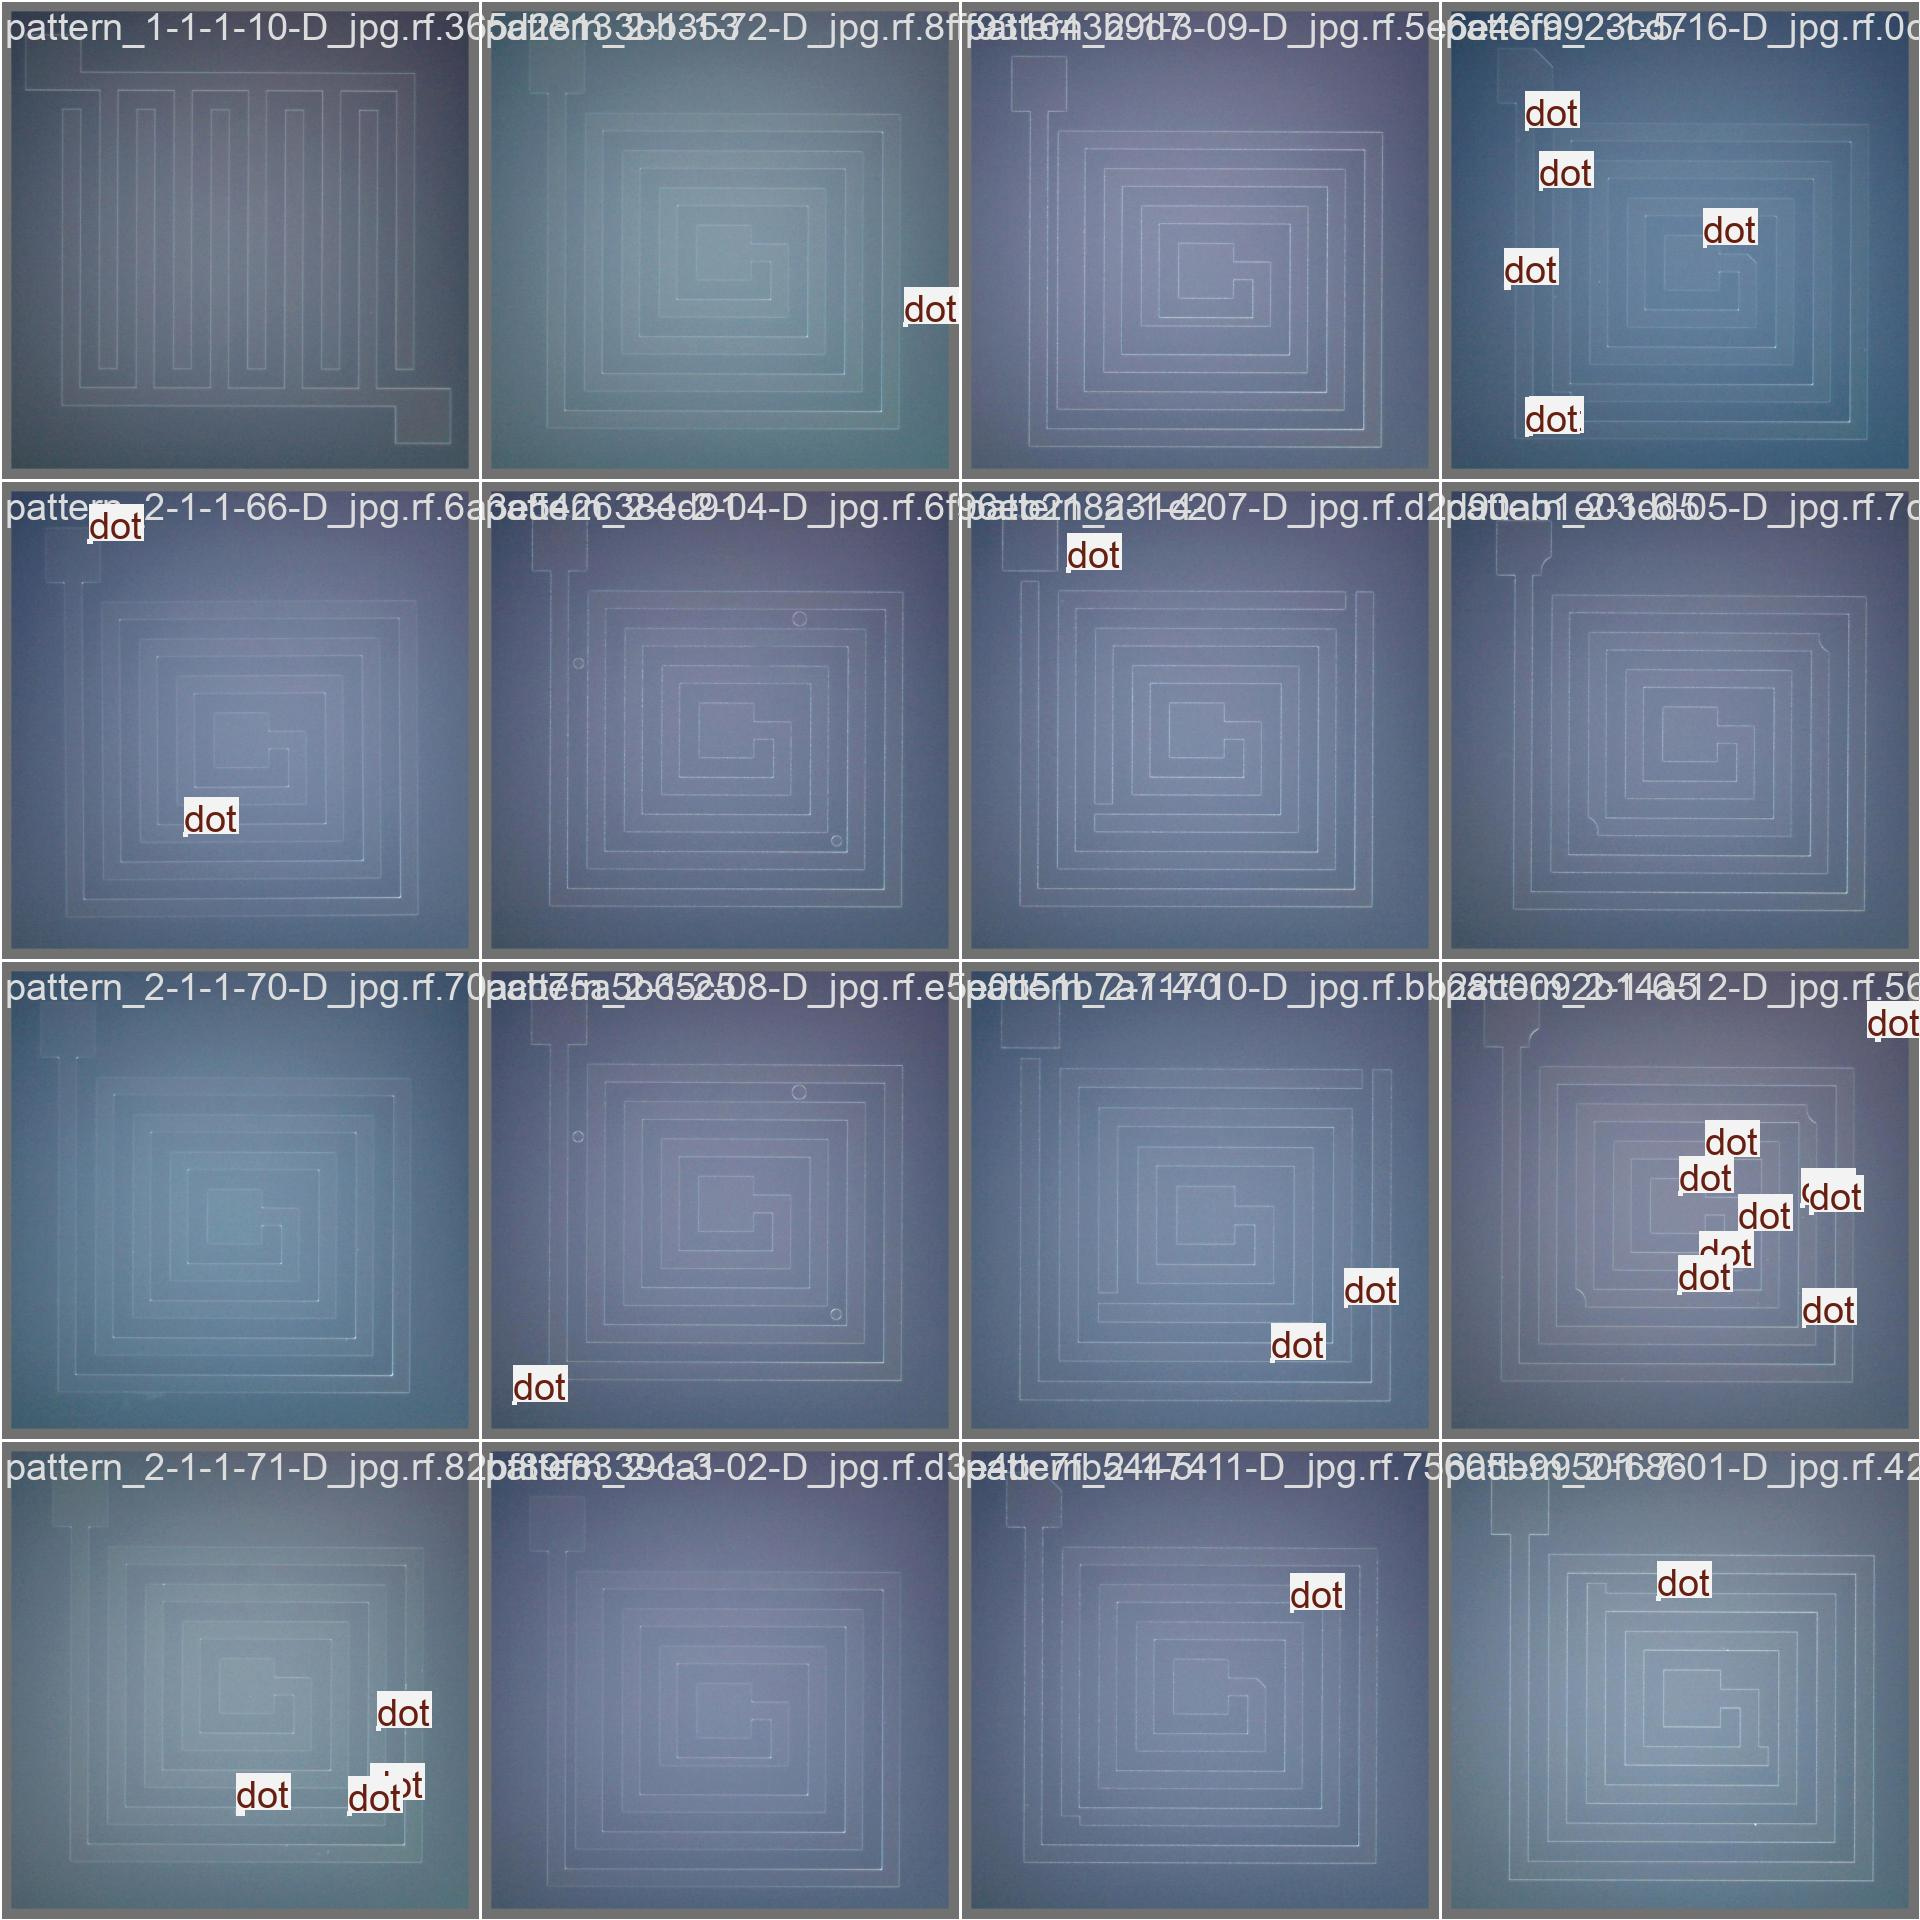

In [9]:
from IPython.display import Image
Image(filename='/content/runs/detect/train2/val_batch0_labels.jpg',width=1000)

In [13]:
import locale
locale.getpreferredencoding = lambda: "UTF-8"
!python val.py --imgsz 1024 --data /content/semiconductor/data.yaml --weights /content/runs/train2/weights/best.pt

python3: can't open file '/content/val.py': [Errno 2] No such file or directory
